# **Mini Project: Boosting Creative Diversity of Generative AI Models via Human Thought Process Mimicry**

This notebook demonstrates an exploration of generative AI models, particularly using Google's Gemini API to generate creative text responses. The project focuses on different techniques for generating creative and contextually rich content, such as multi-level query segmentation (MQS) and random temperature manipulation, and compares the results with a base model.

Additionally, the notebook evaluates the quality of generated content through entropy and intra-cosine similarity metrics to analyze the randomness and similarity between multiple outputs.

## Introduction

This project delves into methods for enhancing the creative diversity of generative AI models by drawing inspiration from how human authors approach creativity. The key technique used here is the **Multi-Level Query Segmentation (MQS)** system, which aims to replicate the way authors take inspiration from existing work.

In addition to MQS, we also employ **randomized temperature manipulation**, a technique designed to mirror the effect of an author's mood on the creative process. For example, if the author feels rebellious or experimental, the model uses a higher temperature setting to promote more diverse and daring outputs. Conversely, a more cautious or neutral mood leads to a lower temperature, producing safer and more predictable results.

The core objective of this project is to introduce human-like factors, such as inspiration and emotional states, into the creative decision-making process of AI, ultimately enabling the generation of content that feels more diverse, dynamic, and in tune with human creativity.

## Methodology

1. **Multi-Level Query Segmentation (MQS)**:  
   The MQS system divides prompts into segments, each representing a different aspect of the inspiration process. These segments allow the AI to take cues from various elements of existing work, effectively replicating how human authors synthesize ideas.

2. **Randomized Temperature Manipulation**:  
   To simulate mood variations in authors, we implement randomized temperature changes in the text generation process. A higher temperature setting corresponds to a more experimental or creative mindset, encouraging less deterministic and more diverse outputs. A lower temperature setting represents a more focused and conventional mindset, producing structured and consistent results.


## Key Components
1. **Dependencies and Configuration:**
   - Installation of necessary libraries and configuration of Google's Gemini model.

2. **Response Generation Techniques:**
   - **Base Model:** A simple text generation using Gemini's generative model.
   - **Multi-Level Query Segmentation (MQS):** Enhancing creativity by prompting the model with contemporary works for inspiration.
   - **Randomized Temperature Manipulation:** Varying the temperature parameter to influence creativity and variability.
   - **Creative Generation:** A hybrid approach combining MQS and temperature manipulation to generate highly creative and diverse outputs.

3. **Quality Analysis of Generated Text:**
   - **Entropy Calculation:** Measuring the unpredictability of the generated text to gauge its creativity.
   - **Intra-Cosine Similarity:** Analyzing the similarity between generated outputs using cosine similarity, variance, and interquartile range (IQR).

4. **Output Comparison and Visualization:**
   - The notebook concludes with cosine similarity comparisons and graphical representations of the variance and IQR of the generated text outputs.

This project serves as an exploration into how various creative generation methods can be quantified and compared for further research and analysis.

## <ins>**Collaborators**</ins>
*   Albin Johns
*   Ashlyn S Pothen
*   Mathew Joe


## Downloading Dependencies

In [ ]:
!pip install -q -U google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.0/760.0 kB 7.7 MB/s eta 0:00:00


## Importing the Modules

In [ ]:
import google.generativeai as genai
import textwrap
from IPython.display import display
from IPython.display import Markdown
# Used to securely store your API key
from google.colab import userdata
import random

## Function to convert response to formated Markdown

In [ ]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

## Configuring the Gemini Model

In [ ]:
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY_AE')
# Configure the generative AI model
genai.configure(api_key=GOOGLE_API_KEY)
model = genai.GenerativeModel('gemini-1.5-flash')

## Base Model Response Generation Function

In [ ]:
def genai_generation(prompt):
    # Generate the content
    response = model.generate_content(prompt)

    # Assuming the response structure has a 'text' attribute
    text = response.text

    # Convert to markdown
    return text

In [ ]:
#display(to_markdown(genai_generation("Give me a short adventure story idea")));

> ## The Lost Library of the Moon
> 
> **Setting:** A remote, forgotten island, shrouded in fog and rumored to be haunted. 
> 
> **Characters:**
> 
> * **A young cartographer:** Obsessed with finding the legendary Lost Library of the Moon, said to hold ancient knowledge of the stars.
> * **A grizzled sailor:** Skeptical but reluctantly agrees to help, driven by a past tragedy connected to the island.
> * **A mysterious scholar:** Appears as a guide, claiming knowledge of the library's secrets, but their motives remain unclear.
> 
> **Conflict:** 
> 
> * **Navigating the treacherous island:** Dangerous terrain, storms, and cryptic clues hidden in the landscape.
> * **Facing the island's guardian:** A mythical creature, said to be the protector of the library, guarding its secrets.
> * **Unraveling the scholar's true intentions:** Are they a friend or foe? Do they seek to use the library's power for good or for gain?
> 
> **Themes:** 
> 
> * The allure of forbidden knowledge.
> * The dangers of ambition and greed.
> * The power of nature and the forces that guard it.
> * The importance of facing one's fears.
> 
> **Ending:**
> 
> * The cartographer finds the library, but its secrets come at a cost.
> * The sailor finds redemption for their past, but with a new sense of wonder.
> * The scholar's true intentions are revealed, leaving the protagonists with a difficult choice.
> 
> **Possible twists:**
> 
> * The scholar is actually a descendant of the library's creator, seeking to reclaim their legacy.
> * The "guardian" is actually a misunderstood creature, protecting the island's true treasure.
> * The library's knowledge is not what it seems, leading to unexpected consequences. 


## Multi-Level Query Segmentation(MQS) Approach Response Generation Function

In [ ]:
def MQS_generation(prompt):
    # Step 1: Modify the original prompt to obtain inpiration from contemporary works.
    bprompt = prompt + " Actually no don't give me that but give me 20 short dialogues or scenes snippets of this same genre, theme or subject that convey deep emotions that I can use as a reference for this subject, take the content from both well-known and obscure works of literature"

    response = model.generate_content(bprompt)
    examples = response.text

    # Step 2: Modify the prompt to call upon inspiration.
    modprompt = prompt + " Take inspiration about characters(name, attitude, and locations and other Named Entities) and scenarios from the following contemporary works and replicate the emotional dialogues or scenes of these examples while writing and copy or take inspiration from its writing style, randomly take inspiration(names and scenarios) from any of the given examples below(or mixture of them)and add in your creativity as well to ensure a characters(names), locations and othe named entities you generate is always truly unique: " + examples

    # Step 3: Generate content based on the modified prompt
    response = model.generate_content(modprompt)
    text = response.text

    # Step 4: Display the result in markdown format
    return text

In [ ]:
#display(to_markdown(MQS_generation("Give me a short adventure story idea")));

> ## The Whispering Woods
> 
> The sun dipped below the horizon, casting long shadows across the whispering woods.  A chill wind whistled through the gnarled branches, rustling leaves like whispers in the dying light.  The air hung heavy with the scent of pine and damp earth, punctuated by the faint, metallic tang of blood.  
> 
> "We shouldn't have come here," whispered Eira, her hand clutching the hilt of her sword.  She was a girl of barely sixteen summers, but her eyes, usually bright and lively, held a deep, unsettling fear.
> 
> "Silence, Eira," hissed Kellan, his voice low and gravelly.  He was a seasoned ranger, his weathered face a map of countless adventures and close calls.  His hand rested on the pommel of his hunting knife, a familiar weight that offered a small measure of comfort. 
> 
> "I told you, we shouldn't have crossed the border," she continued, her voice trembling.  "The old tales warned against the Whispering Woods."
> 
> Kellan, ever the pragmatist, scoffed.  "Fairy tales for frightened children," he dismissed, but his gaze remained fixed on the deepening shadows ahead.  
> 
> "But there's something wrong here," Eira insisted, her voice rising with fear.  "I can feel it."  She pointed to the distant hill, shrouded in a thick veil of mist.  "The air…it's cold, like a dead hand."
> 
> Kellan remained silent, listening to the wind rustle the leaves.  He felt it too, the prickling unease in the air.  There was something sinister lurking in the shadows, something that gnawed at the edges of his senses.
> 
> "What are we waiting for?" Eira asked, her voice cracking with apprehension.  "Let's go back."
> 
> Kellan shook his head, his gaze fixed on the distant hill.  "We're not leaving until we find her."
> 
> "Find who?" Eira asked, her voice tight with confusion.
> 
> "The girl," Kellan muttered, his eyes narrowed.  "The girl who disappeared in these woods."
> 
> Their quest for the missing girl had taken them to the Whispering Woods, a place where legends and nightmares danced together.  Now, as darkness enveloped them, they found themselves at the precipice of something far more dangerous than they had ever imagined.  
> 
> "What if she's already…" Eira's voice trailed off, the unspoken fear hanging heavy in the air.
> 
> Kellan placed a hand on her shoulder, his touch firm and reassuring.  "We'll find her," he promised, his voice filled with a determination that did little to quell the rising tide of fear in his own heart.  "We have to."
> 
> The wind howled, a mournful cry that seemed to echo their own anxieties.  As they ventured deeper into the heart of the Whispering Woods, they knew their journey had just begun, and the whispers of the forest held secrets that threatened to consume them.


## Randomized Temperature Manipulation Approach Response Generation Function

In [ ]:
def randomisedTemp_generation(prompt):
    """
    Generates a story using a random temperature and displays it in markdown format.
    """
    # Generate a random temperature between 0.0 and 2.0
    integer = random.randint(0, 20)
    temperature = integer / 10
    #print("Temperature: " + str(temperature))

    # Generate content with random temperature
    response = model.generate_content(
        prompt,
        generation_config=genai.types.GenerationConfig(temperature=temperature)
    )

    # Extract the text from the response
    text = response.text

    # Display the result in markdown format
    return text

In [ ]:
#display(to_markdown(randomisedTemp_generation("Give me a short adventure story idea")));

> ## The Lost Melody
> 
> **Setting:** A bustling, magical city where music is currency.
> 
> **Characters:**
> 
> * **A young, aspiring musician named Lyra** who dreams of composing a masterpiece but struggles to find her voice.
> * **A mysterious, elderly street performer named Maestro** who possesses a legendary instrument rumored to hold the key to unlocking forgotten melodies.
> 
> **Plot:**
> 
> Lyra discovers a hidden melody in an ancient book, but it's incomplete. To finish it, she needs the legendary instrument Maestro owns. However, Maestro is reluctant to share it, believing it's too powerful for anyone to handle. Lyra must prove herself worthy by facing a series of musical challenges, each representing a different emotion the melody embodies.
> 
> **Obstacles:**
> 
> * **Rival musicians** who covet the instrument and try to sabotage Lyra.
> * **A magical entity** that feeds on lost melodies, trying to steal the incomplete melody before Lyra can finish it.
> * **Lyra's own self-doubt** as she struggles to master the instrument and find her own musical voice.
> 
> **Resolution:**
> 
> Lyra overcomes her challenges and completes the melody, revealing its true power: the ability to heal broken hearts and bring peace to the city. Maestro finally recognizes her talent and entrusts her with the instrument, knowing she can use it for good. 


## Creative Response Generation Function

In [ ]:
def creative_generation(prompt):
    # Step 1: Modify the original prompt to obtain inpiration from contemporary works.
    bprompt = prompt + " Actually no don't give me that but give me 20 short dialogues or scenes snippets of this same genre, theme or subject that convey deep emotions that I can use as a reference for this subject, take the content from both well-known and obscure works of literature"

    integer = random.randint(0, 20)
    temperature = integer / 10

    print("Temperature for Inspiration: " + str(temperature))

    # Generate content with random temperature
    response = model.generate_content(
        bprompt,
        generation_config=genai.types.GenerationConfig(temperature=temperature)
    )
    examples = response.text

    # Step 2: Modify the prompt to call upon inspiration.
    modprompt = prompt + " Take inspiration about characters(name, attitude, and locations and other Named Entities) and scenarios from the following contemporary works and replicate the emotional dialogues or scenes of these examples while writing and copy or take inspiration from its writing style, randomly take inspiration(names and scenarios) from any of the given examples below(or mixture of them)and add in your creativity as well to ensure a characters(names), locations and othe named entities you generate is always truly unique: " + examples

    # Step 3: Generate content based on the modified prompt
    integer = random.randint(0, 20)
    temperature = integer / 10
    print("Temperature for final output: " + str(temperature))

    # Generate content with random temperature
    response = model.generate_content(
        modprompt,
        generation_config=genai.types.GenerationConfig(temperature=temperature)
    )
    text = response.text

    # Step 4: Display the result in markdown format
    return text

In [ ]:
#display(to_markdown(creative_generation("Give me a short adventure story idea")));

Temperature for Inspiration: 1.8
Temperature for final output: 1.0


> ## The Whispering Ruins of Arcturus
> 
> The wind howled through the skeletal remains of the ancient city of Arcturus, a symphony of mournful whispers echoing through the crumbling archways and skeletal towers.  A lone figure, **Eira**, a young woman with fiery red hair and eyes that held the glint of a thousand sunsets, stood at the precipice of the forgotten city.  Fear, a cold, insistent presence, clawed at her heart.  
> 
> "There's no shame in being afraid, child," a voice, raspy and ancient, spoke from behind her. Eira whirled around, her hand instinctively reaching for the dagger strapped to her thigh. 
> 
> An old woman, **Elara**, with eyes that mirrored the wisdom of the ages, smiled kindly. "Fear is the compass that leads us to courage," she continued, her words carried by the wind.  
> 
> Eira hesitated, her hand hovering above the hilt of her dagger. "But how can I be brave when I feel so lost?" she whispered, her voice trembling.
> 
> Elara's smile widened, her eyes twinkling with understanding.  "You are not lost, child," she said, her voice soothing. "You are searching.  And in this search, you will find yourself."
> 
> Eira looked back at the ruins of Arcturus, the wind whipping at her hair, carrying the whispered secrets of the past. "I'm here to find my father," she said, her voice gaining strength. "He vanished years ago, swallowed by these ruins."
> 
> Elara placed a wrinkled hand on Eira's shoulder, her touch warm and reassuring. "The whispers of this city will guide you," she promised. "But you must listen with an open heart." 
> 
> Eira nodded, taking a deep breath. The fear remained, a constant companion, but a newfound resolve blossomed within her. She would face the whispers, the shadows, and the fear itself.  She would find her father, or she would find her own strength in the face of her loss.  And in the whispering ruins of Arcturus, she would finally discover who she truly was. 


## Creating Output Files using the functions(for further research and resource conservation).

### For Base Model

In [ ]:
# def save_genai_outputs(prompt, filename):
#     # Open the file in write mode
#     with open(filename, 'w') as file:
#         for i in range(10):
#             # Call the genai_generation function
#             response = genai_generation(prompt)

#             # Write the response to the file
#             file.write(response)
#             file.write("\n")

In [ ]:
# prompt = "Give me a short adventure story plot in a paragraph"
# save_genai_outputs(prompt, 'genai_outputs.txt')

### For MQS

We are using the time.sleep() to prevent hitting the rate limits of gemini model.

In [ ]:
# import time

# def save_MSQ_genai_outputs(prompt, filename):
#     # Open the file in write mode
#     with open(filename, 'w') as file:
#         for i in range(10):
#             # Call the MQS_generation function
#             response = MQS_generation(prompt)

#             # Write the response to the file
#             file.write(response)
#             file.write("\n")

#             # After every 3 calls, wait for 60 seconds
#             if (i + 1) % 3 == 0 and i != 9:  # Avoid waiting after the last call
#                 print(f"Waiting for a minute after {i + 1} calls...")
#                 time.sleep(60)  # Wait for 60 seconds

In [ ]:
# prompt = "Give me a short adventure story plot in a paragraph"
# save_MSQ_genai_outputs(prompt, 'MSQ_GenAI_outputs.txt')

### For Randomized Temperature Manipulation Method

In [ ]:
# def save_randTemp_genai_outputs(prompt, filename):
#     # Open the file in write mode
#     with open(filename, 'w') as file:
#         for i in range(10):
#             # Call the genai_generation function
#             response = randomisedTemp_generation(prompt)

#             # Write the response to the file
#             file.write(response)
#             file.write("\n")

In [ ]:
# prompt = "Give me a short adventure story plot in a paragraph"
# save_randTemp_genai_outputs(prompt, 'randTemp_GenAI_outputs.txt')

### For Creative Generation

Here, too we are using the time.sleep() to prevent hitting the rate limits.

In [ ]:
# import time

# def save_creative_genai_outputs(prompt, filename):
#     # Open the file in write mode
#     with open(filename, 'w') as file:
#         for i in range(10):
#             # Call the MQS_generation function
#             response = creative_generation(prompt)

#             # Write the response to the file
#             file.write(response)
#             file.write("\n")

#             # After every 3 calls, wait for 60 seconds
#             if (i + 1) % 3 == 0 and i != 9:  # Avoid waiting after the last call
#                 print(f"Waiting for a minute after {i + 1} calls...")
#                 time.sleep(60)  # Wait for 60 seconds


In [ ]:
# prompt = "Give me a short adventure story plot in a paragraph"
# save_creative_genai_outputs(prompt, 'creative_GenAI_outputs.txt')

## Function to calculate Entropy

In [ ]:
import math
from collections import Counter

# Entropy calculation function
def calculate_entropy(sequence):
    counts = Counter(sequence)
    total_count = len(sequence)

    entropy = 0.0
    for symbol, count in counts.items():
        probability = count / total_count
        entropy -= probability * math.log2(probability)

    return entropy

# Function to calculate entropy for each sequence in the file and compute the average
def calculate_file_entropy(filename):
    try:
        with open(filename, 'r') as file:
            # Read the content of the file
            content = file.read()

            # Split the content into separate sequences (each sequence is a non-empty line)
            sequences = [line for line in content.split("\n") if line.strip()]

            # If there are no sequences, return 0
            if not sequences:
                return 0

            # Calculate entropy for each sequence
            entropies = [calculate_entropy(sequence) for sequence in sequences]

            # Calculate the average entropy
            avg_entropy = sum(entropies) / len(entropies)

            # Print the average entropy
            print(f"Average Entropy of the file: {avg_entropy:.4f}")
            return avg_entropy
    except FileNotFoundError:
        print(f"File {filename} not found!")
        return None


In [ ]:
# Example usage
filename = 'genai_outputs.txt'
calculate_file_entropy(filename)

Average Entropy of the file: 4.2404


4.240420958862462

In [ ]:
# Example usage
filename = '/content/MSQ_GenAI_outputs.txt'
calculate_file_entropy(filename)

Average Entropy of the file: 4.2603


4.260269070036154

In [ ]:
# Example usage
filename = 'randTemp_GenAI_outputs.txt'
calculate_file_entropy(filename)

Average Entropy of the file: 4.2478


4.247818570102586

In [ ]:
# Example usage
filename = 'creative_GenAI_outputs.txt'
calculate_file_entropy(filename)

Average Entropy of the file: 4.2784


4.278419467295052

## Function to calculate Intra-Cosine Similarities

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import itertools
import statistics  # Importing statistics for variance calculation
import numpy as np  # Importing numpy for IQR calculation

def intra_cosine_similarity(filename):
    # Step 1: Read the file and get the outputs
    with open(filename, 'r') as file:
        content = file.read()

    # Split the content into separate outputs based on newlines and remove empty entries
    outputs = [output for output in content.split("\n") if output.strip()]

    # List to store cosine similarity scores
    cosine_similarities = []

    # Get all possible combinations of output pairs
    output_pairs = list(itertools.combinations(range(len(outputs)), 2))

    # Step 2: Calculate cosine similarity for each pair
    for i, j in output_pairs:
        # Create a TfidfVectorizer and fit it for just the two selected outputs
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform([outputs[i], outputs[j]])

        # Calculate the cosine similarity for this pair
        similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

        # Store the result in the list
        cosine_similarities.append(similarity)

        # Print the cosine similarity for the current pair
        print(f"Cosine similarity between Output {i+1} and Output {j+1}: {similarity:.4f}")

    # Step 3: Calculate the variance
    variance_similarity = statistics.variance(cosine_similarities)
    print(f"\nVariance of Cosine Similarities: {variance_similarity:.4f}")

    # Step 4: Calculate the interquartile range (IQR)
    q1 = np.percentile(cosine_similarities, 25)  # 1st quartile
    q3 = np.percentile(cosine_similarities, 75)  # 3rd quartile
    iqr_similarity = q3 - q1
    print(f"Interquartile Range (IQR) of Cosine Similarities: {iqr_similarity:.4f}")

    return {
        "variance": variance_similarity,
        "iqr": iqr_similarity
    }


In [ ]:
intra_cosine_similarity('genai_outputs.txt')

Cosine similarity between Output 1 and Output 2: 0.5484
Cosine similarity between Output 1 and Output 3: 0.4796
Cosine similarity between Output 1 and Output 4: 0.4756
Cosine similarity between Output 1 and Output 5: 0.5068
Cosine similarity between Output 1 and Output 6: 0.3978
Cosine similarity between Output 1 and Output 7: 0.5184
Cosine similarity between Output 1 and Output 8: 0.4749
Cosine similarity between Output 1 and Output 9: 0.5210
Cosine similarity between Output 1 and Output 10: 0.3611
Cosine similarity between Output 2 and Output 3: 0.4590
Cosine similarity between Output 2 and Output 4: 0.5446
Cosine similarity between Output 2 and Output 5: 0.4488
Cosine similarity between Output 2 and Output 6: 0.3928
Cosine similarity between Output 2 and Output 7: 0.5247
Cosine similarity between Output 2 and Output 8: 0.4094
Cosine similarity between Output 2 and Output 9: 0.4597
Cosine similarity between Output 2 and Output 10: 0.3311
Cosine similarity between Output 3 and Output 

{'variance': 0.00581351822970979, 'iqr': 0.12039835759998296}

In [ ]:
intra_cosine_similarity('creative_GenAI_outputs.txt')

Cosine similarity between Output 1 and Output 2: 0.6233
Cosine similarity between Output 1 and Output 3: 0.6915
Cosine similarity between Output 1 and Output 4: 0.5861
Cosine similarity between Output 1 and Output 5: 0.5246
Cosine similarity between Output 1 and Output 6: 0.5371
Cosine similarity between Output 1 and Output 7: 0.2503
Cosine similarity between Output 1 and Output 8: 0.5448
Cosine similarity between Output 1 and Output 9: 0.6623
Cosine similarity between Output 1 and Output 10: 0.5434
Cosine similarity between Output 1 and Output 11: 0.3943
Cosine similarity between Output 1 and Output 12: 0.6085
Cosine similarity between Output 2 and Output 3: 0.6504
Cosine similarity between Output 2 and Output 4: 0.5379
Cosine similarity between Output 2 and Output 5: 0.5218
Cosine similarity between Output 2 and Output 6: 0.5527
Cosine similarity between Output 2 and Output 7: 0.2307
Cosine similarity between Output 2 and Output 8: 0.4856
Cosine similarity between Output 2 and Output

{'variance': 0.016362324089255136, 'iqr': 0.15194862970214618}

## Plotting Intra-Cosine Similarities

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import itertools
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced plotting
import textwrap  # For wrapping labels

def calculate_cosine_similarities(filename):
    """Calculate cosine similarities for outputs in the given text file."""
    with open(filename, 'r') as file:
        content = file.read()

    # Split the content into separate outputs based on newlines and remove empty entries
    outputs = [output for output in content.split("\n") if output.strip()]

    # List to store cosine similarity scores
    cosine_similarities = []

    # Get all possible combinations of output pairs
    output_pairs = list(itertools.combinations(range(len(outputs)), 2))

    # Calculate cosine similarity for each pair
    for i, j in output_pairs:
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform([outputs[i], outputs[j]])
        similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
        cosine_similarities.append(similarity)

    return cosine_similarities

def plot_boxplots(filenames, labels):
    """Plot boxplots of cosine similarities from multiple text files with custom labels."""
    all_similarities = []  # List to store similarities for each file

    for filename in filenames:
        similarities = calculate_cosine_similarities(filename)
        all_similarities.append(similarities)

    # Create a boxplot for all cosine similarities
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=all_similarities)

    # Set the titles and labels
    plt.title('Boxplots of Intra Cosine Similarities from Multiple Approaches')
    plt.ylabel('Cosine Similarity')
    plt.xlabel('Models')

    # Wrap the labels to avoid overlap
    wrapped_labels = [textwrap.fill(label, width=20) for label in labels]
    plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels)

    # Show the plot
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for the labels
    plt.show()


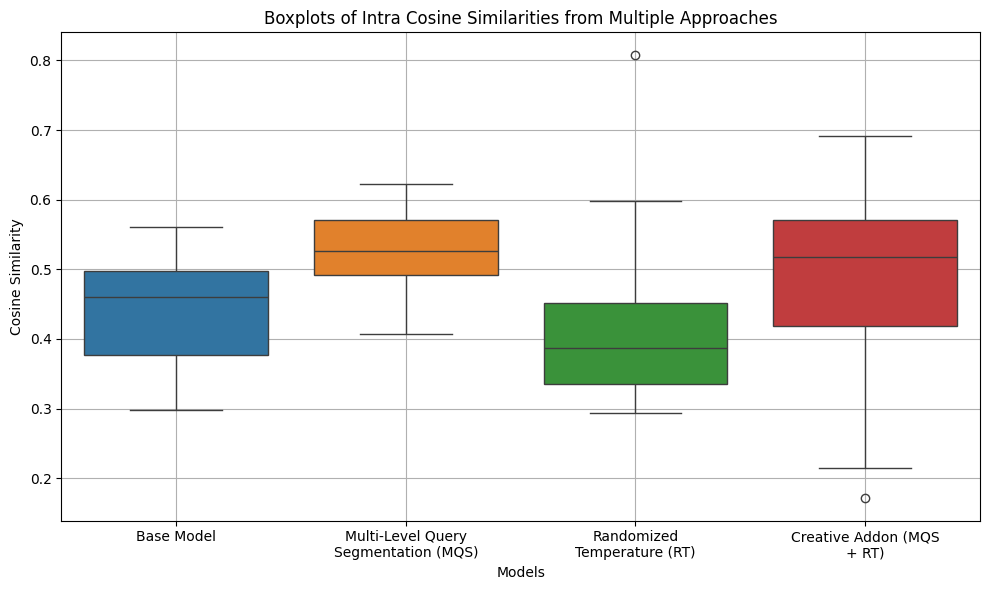

In [ ]:
filenames = ['genai_outputs.txt', 'MSQ_GenAI_outputs.txt', 'randTemp_GenAI_outputs.txt', 'creative_GenAI_outputs.txt']  # List your text files here
labels = [
    "Base Model",
    "Multi-Level Query Segmentation (MQS)",
    "Randomized Temperature (RT)",
    "Creative Addon (MQS + RT)"
]
plot_boxplots(filenames, labels)

## Plotting Entropies

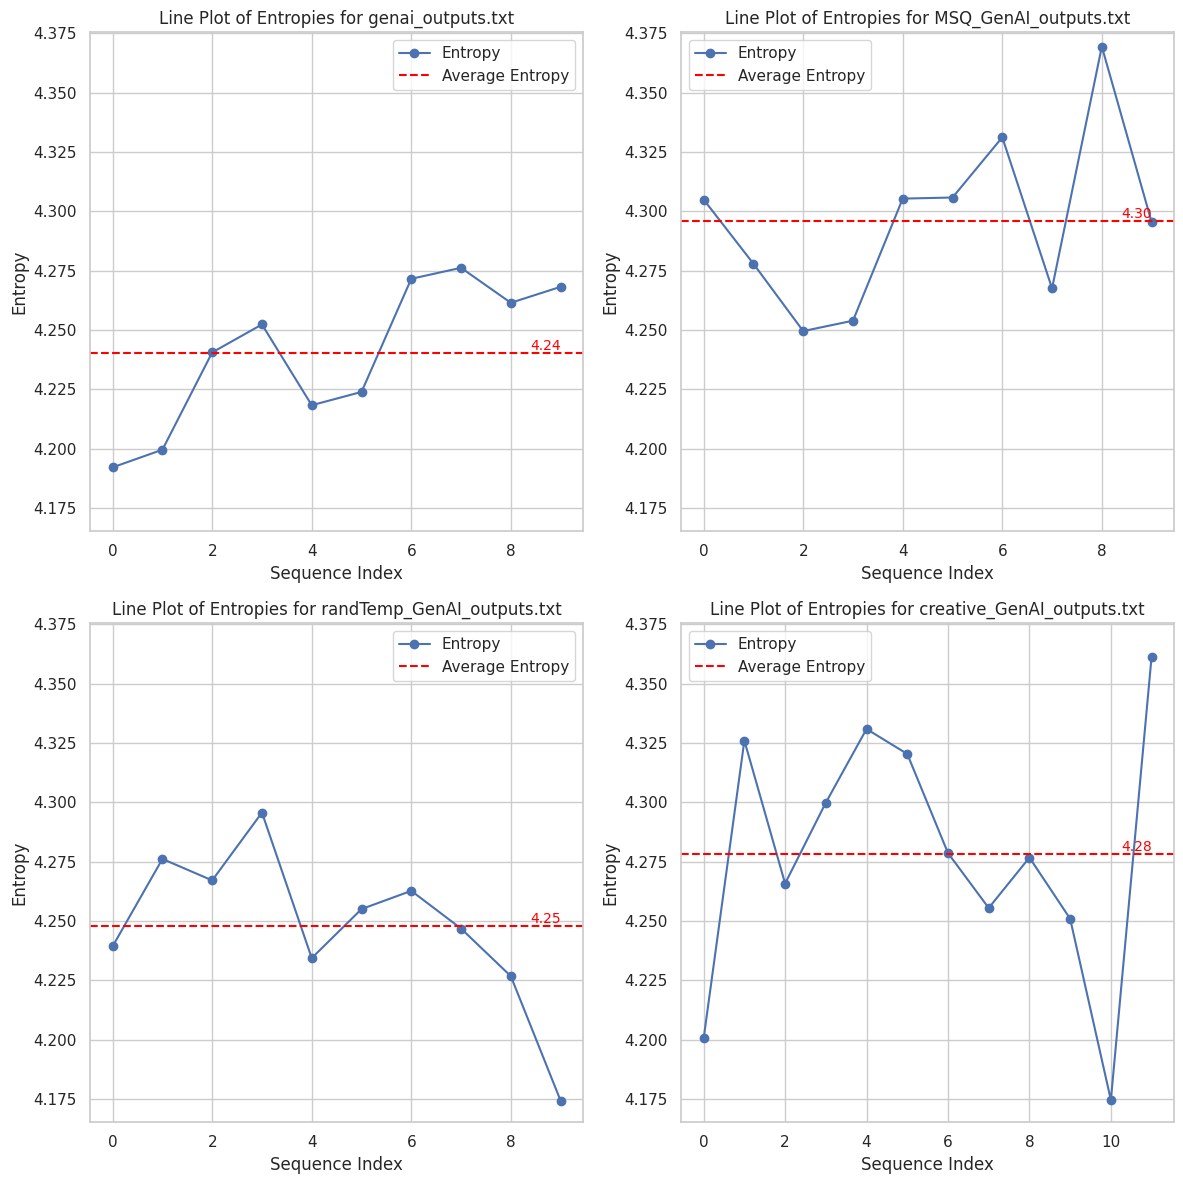

In [ ]:
import math
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Entropy calculation function
def calculate_entropy(sequence):
    counts = Counter(sequence)
    total_count = len(sequence)

    entropy = 0.0
    for symbol, count in counts.items():
        probability = count / total_count
        entropy -= probability * math.log2(probability)

    return entropy

# Function to calculate entropy for each sequence in the file and compute the average
def calculate_file_entropy(filename):
    try:
        with open(filename, 'r') as file:
            # Read the content of the file
            content = file.read()

            # Split the content into separate sequences (each sequence is a non-empty line)
            sequences = [line for line in content.split("\n") if line.strip()]

            # If there are no sequences, return 0
            if not sequences:
                return 0

            # Calculate entropy for each sequence
            entropies = [calculate_entropy(sequence) for sequence in sequences]

            # Calculate the average entropy
            avg_entropy = sum(entropies) / len(entropies)

            return entropies, avg_entropy  # Return the list of entropies and the average for plotting
    except FileNotFoundError:
        print(f"File {filename} not found!")
        return None

# Function to plot entropies of multiple files as subplots in a grid with synced y-axes
def plot_entropies_multiple_files(filenames):
    num_files = len(filenames)
    cols = 2  # Set number of columns
    rows = (num_files + cols - 1) // cols  # Calculate required number of rows

    plt.figure(figsize=(12, 6 * rows))  # Adjust figure height based on number of files

    # Create subplots with shared y-axis
    axes = []
    for i in range(num_files):
        ax = plt.subplot(rows, cols, i + 1)
        axes.append(ax)

    for i, filename in enumerate(filenames):
        result = calculate_file_entropy(filename)
        if result is not None:
            entropies, avg_entropy = result

            # Create line plot for each file
            axes[i].plot(range(len(entropies)), entropies, marker='o', linestyle='-', label='Entropy')
            axes[i].axhline(y=avg_entropy, color='red', linestyle='--', label='Average Entropy')

            # Label the average entropy line
            axes[i].text(len(entropies) - 1, avg_entropy, f'{avg_entropy:.2f}',
                          color='red', fontsize=10, ha='right', va='bottom')

            axes[i].set_title(f'Line Plot of Entropies for {filename}')
            axes[i].set_xlabel('Sequence Index')
            axes[i].set_ylabel('Entropy')
            axes[i].legend()

    # Sync y-axis limits across all subplots
    y_limits = [ax.get_ylim() for ax in axes]
    min_y = min(limit[0] for limit in y_limits)
    max_y = max(limit[1] for limit in y_limits)

    for ax in axes:
        ax.set_ylim(min_y, max_y)

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage
filenames = ['genai_outputs.txt', 'MSQ_GenAI_outputs.txt', 'randTemp_GenAI_outputs.txt', 'creative_GenAI_outputs.txt']
plot_entropies_multiple_files(filenames)


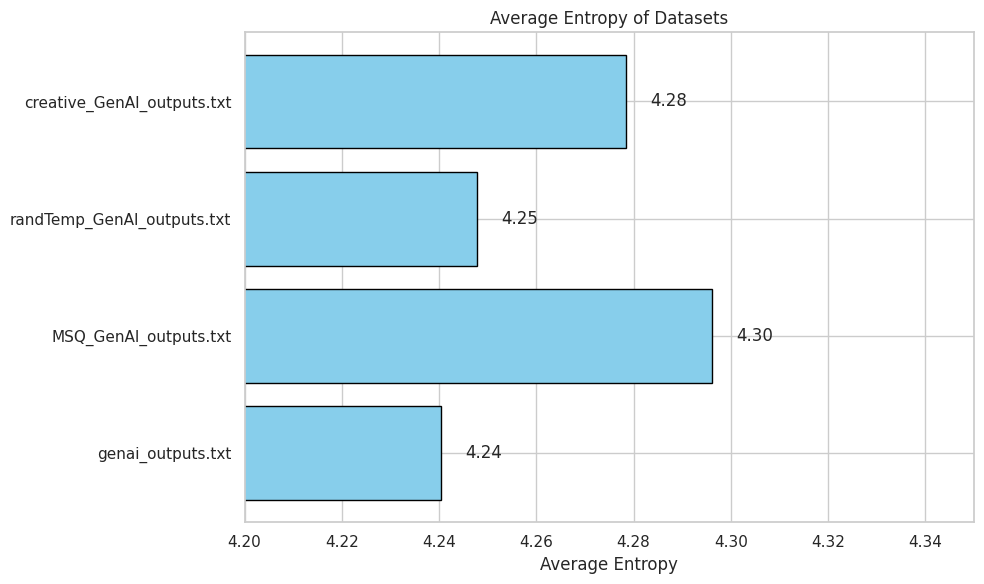

In [ ]:
import math
from collections import Counter
import matplotlib.pyplot as plt

# Function to calculate average entropy for each sequence in the file
def calculate_average_entropy(filename):
    try:
        with open(filename, 'r') as file:
            content = file.read()
            sequences = [line for line in content.split("\n") if line.strip()]
            if not sequences:
                return 0

            entropies = []
            for sequence in sequences:
                counts = Counter(sequence)
                total_count = len(sequence)
                entropy = -sum((count / total_count) * math.log2(count / total_count) for count in counts.values())
                entropies.append(entropy)

            avg_entropy = sum(entropies) / len(entropies)
            return avg_entropy  # Return the average entropy for the file
    except FileNotFoundError:
        print(f"File {filename} not found!")
        return None

# Function to plot average entropies of multiple files as horizontal bar plots
def plot_average_entropies(filenames):
    average_entropies = []

    for filename in filenames:
        avg_entropy = calculate_average_entropy(filename)
        if avg_entropy is not None:
            average_entropies.append(avg_entropy)

    # Create a horizontal bar plot for average entropies
    plt.figure(figsize=(10, 6))
    bars = plt.barh(filenames, average_entropies, color='skyblue', edgecolor='black')

    # Set a fixed y-axis scale for better visibility
    plt.xlim(4.2, 4.35)  # Adjust this range based on your values

    plt.xlabel('Average Entropy')
    plt.title('Average Entropy of Datasets')

    # Adding value labels on the bars
    for bar in bars:
        plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
                 va='center')

    plt.tight_layout()
    plt.show()

# Example usage
filenames = ['genai_outputs.txt', 'MSQ_GenAI_outputs.txt', 'randTemp_GenAI_outputs.txt', 'creative_GenAI_outputs.txt']
plot_average_entropies(filenames)
